In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
import networkx as nx
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler


In [566]:
dF=pd.read_csv('ACS_10_5YR_DP02_with_ann.csv')
print(dF.shape)
dF.head(5)

(465, 599)


GEO.id GEO.id2          GEO.display-label  \
0              Id     Id2                  Geography   
1  0500000US21001   21001     Adair County, Kentucky   
2  0500000US21003   21003     Allen County, Kentucky   
3  0500000US21005   21005  Anderson County, Kentucky   
4  0500000US21007   21007   Ballard County, Kentucky   

                                         HC01_VC03  \
0  Estimate; HOUSEHOLDS BY TYPE - Total households   
1                                             7272   
2                                             7811   
3                                             8319   
4                                             3363   

                                           HC02_VC03  \
0  Estimate Margin of Error; HOUSEHOLDS BY TYPE -...   
1                                                270   
2                                                291   
3                                                205   
4                                                146   

                                        HC03_VC03  \
0  Percent; HOUSEHOLDS BY TYPE - Total households   
1                                            7272   
2                                            7811   
3                                            8319   
4                                            3363   

                                           HC04_VC03  \
0  Percent Margin of Error; HOUSEHOLDS BY TYPE - ...   
1                                                (X)   
2                                                (X)   
3                                                (X)   
4                                                (X)   

                                           HC01_VC04  \
0  Estimate; HOUSEHOLDS BY TYPE - Family househol...   
1                                               5004   
2                                               5526   
3                                               6148   
4                                               2408   

                                           HC02_VC04  \
0  Estimate Margin of Error; HOUSEHOLDS BY TYPE -...   
1                                                262   
2                                                331   
3                                                302   
4                                                144   

                                           HC03_VC04  \
0  Percent; HOUSEHOLDS BY TYPE - Family household...   
1                                               68.8   
2                                               70.7   
3                                               73.9   
4                                               71.6   

                                           HC04_VC04  \
0  Percent Margin of Error; HOUSEHOLDS BY TYPE - ...   
1                                                3.5   
2                                                3.2   
3                                                3.4   
4                                                2.9   

                                           HC01_VC06  \
0  Estimate; HOUSEHOLDS BY TYPE - Family househol...   
1                                               1945   
2                                               2363   
3                                               2771   
4                                               1001   

                                           HC02_VC06  \
0  Estimate Margin of Error; HOUSEHOLDS BY TYPE -...   
1                                                228   
2                                                229   
3                                                261   
4                                                122   

                                           HC03_VC06  \
0  Percent; HOUSEHOLDS BY TYPE - Family household...   
1                                               26.7   
2                                               30.3   
3                                               33.3   
4                                               29.8  

In [595]:
dF=pd.read_csv('ACS_10_5YR_DP02_with_ann.csv')
lostItems=[]
for col in list(dF.columns):
    if dF[col].iloc[1]=='(X)' or 'Error;' in str(dF[col].iloc[0]).split() or 'Percent;' in str(dF[col].iloc[0]).split():
        dF.pop(col)
for i in range(3,dF.shape[0]):
    for j in range(3,dF.shape[1]):
        try:
            float(dF.iloc[i][j])
        except:
            dF.iloc[i][j]=np.nan
#             print(type(dF.iloc[i][j]),dF.iloc[i][j],(i,j))
            lostItems.append([dF.iloc[i][j],i,j])
#             dF.iloc[i][j]=0
            
# imp = Imputer(missing_values='*****', strategy='mean', axis=0)
# imp.fit(np.array(dF.iloc[3:,3:]))
#清洗数据
lostItems=pd.DataFrame(lostItems,columns=['value','index','column'])
dF.fillna(dF.mean())

GEO.id GEO.id2                    GEO.display-label  \
0                Id     Id2                            Geography   
1    0500000US21001   21001               Adair County, Kentucky   
2    0500000US21003   21003               Allen County, Kentucky   
3    0500000US21005   21005            Anderson County, Kentucky   
4    0500000US21007   21007             Ballard County, Kentucky   
5    0500000US21009   21009              Barren County, Kentucky   
6    0500000US21011   21011                Bath County, Kentucky   
7    0500000US21013   21013                Bell County, Kentucky   
8    0500000US21015   21015               Boone County, Kentucky   
9    0500000US21017   21017             Bourbon County, Kentucky   
10   0500000US21019   21019                Boyd County, Kentucky   
11   0500000US21021   21021               Boyle County, Kentucky   
12   0500000US21023   21023             Bracken County, Kentucky   
13   0500000US21025   21025           Breathitt County, Kentucky   
14   0500000US21027   21027        Breckinridge County, Kentucky   
15   0500000US21029   21029             Bullitt County, Kentucky   
16   0500000US21031   21031              Butler County, Kentucky   
17   0500000US21033   21033            Caldwell County, Kentucky   
18   0500000US21035   21035            Calloway County, Kentucky   
19   0500000US21037   21037            Campbell County, Kentucky   
20   0500000US21039   21039            Carlisle County, Kentucky   
21   0500000US21041   21041             Carroll County, Kentucky   
22   0500000US21043   21043              Carter County, Kentucky   
23   0500000US21045   21045               Casey County, Kentucky   
24   0500000US21047   21047           Christian County, Kentucky   
25   0500000US21049   21049               Clark County, Kentucky   
26   0500000US21051   21051                Clay County, Kentucky   
27   0500000US21053   21053             Clinton County, Kentucky   
28   0500000US21055   21055          Crittenden County, Kentucky   
29   0500000US21057   21057          Cumberland County, Kentucky   
30   0500000US21059   21059             Daviess County, Kentucky   
31   0500000US21061   21061            Edmonson County, Kentucky   
32   0500000US21063   21063             Elliott County, Kentucky   
33   0500000US21065   21065              Estill County, Kentucky   
34   0500000US21067   21067             Fayette County, Kentucky   
35   0500000US21069   21069             Fleming County, Kentucky   
36   0500000US21071   21071               Floyd County, Kentucky   
37   0500000US21073   21073            Franklin County, Kentucky   
38   0500000US21075   21075              Fulton County, Kentucky   
39   0500000US21077   21077            Gallatin County, Kentucky   
40   0500000US21079   21079             Garrard County, Kentucky   
41   0500000US21081   21081               Grant County, Kentucky   
42   0500000US21083   21083              Graves County, Kentucky   
43   0500000US21085   21085             Grayson County, Kentucky   
44   0500000US21087   21087               Green County, Kentucky   
45   0500000US21089   21089             Greenup County, Kentucky   
46   0500000US21091   21091             Hancock County, Kentucky   
47   0500000US21093   21093              Hardin County, Kentucky   
48   0500000US21095   21095              Harlan County, Kentucky   
49   0500000US21097   21097            Harrison County, Kentucky   
50   0500000US21099   21099                Hart County, Kentucky   
51   0500000US21101   21101           Henderson County, Kentucky   
52   0500000US21103   21103               Henry County, Kentucky   
53   0500000US21105   21105             Hickman County, Kentucky   
54   0500000US21107   21107             Hopkins County, Kentucky   
55   0500000US21109   21109             Jackson County, Kentucky   
56   0500000US21111   21111           Jefferson County, Kentucky   
57   0500000US21113   21113           Jessamine County, Kentucky   
5

In [513]:
lostItems.sort_values('column')

Empty DataFrame
Columns: [value, index, column]
Index: []

In [593]:
def plotCorr(dF_corr):
    fig, ax = plt.subplots()

    image = np.array(dF_corr)
    ax.imshow(image, cmap='viridis', interpolation='nearest')
    ax.set_title('Corr')

    # Move left and bottom spines outward by 10 points
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['figure.figsize']=[16,9]
    plt.show()
    #画相关系数的图

In [377]:
def dropCol(dFData_local,th,nm):
    corrList=[]
    popList=[]
    dropList=[]
    for i in range(dF_corr.shape[0]):
        count=0
        for j in range(dF_corr.shape[0]):
            if dF_corr.iloc[i,j]>th:
                count+=1
        corrList.append([count,dFData_local.index[i]])
    corrList=pd.DataFrame(corrList,columns=['count','dFcol'])
    corrList.head()
    popList=corrList[corrList['count']>nm]
    columnList=list(dFData_local.columns)
    for i in range(popList.shape[0]):
        dropList.append(columnList[popList.iloc[i]['dFcol']])
    #print(dropList)
    for col in dropList:
        dFData_local.pop(col)
    return(dFData_local) 
    #丢弃一些列表

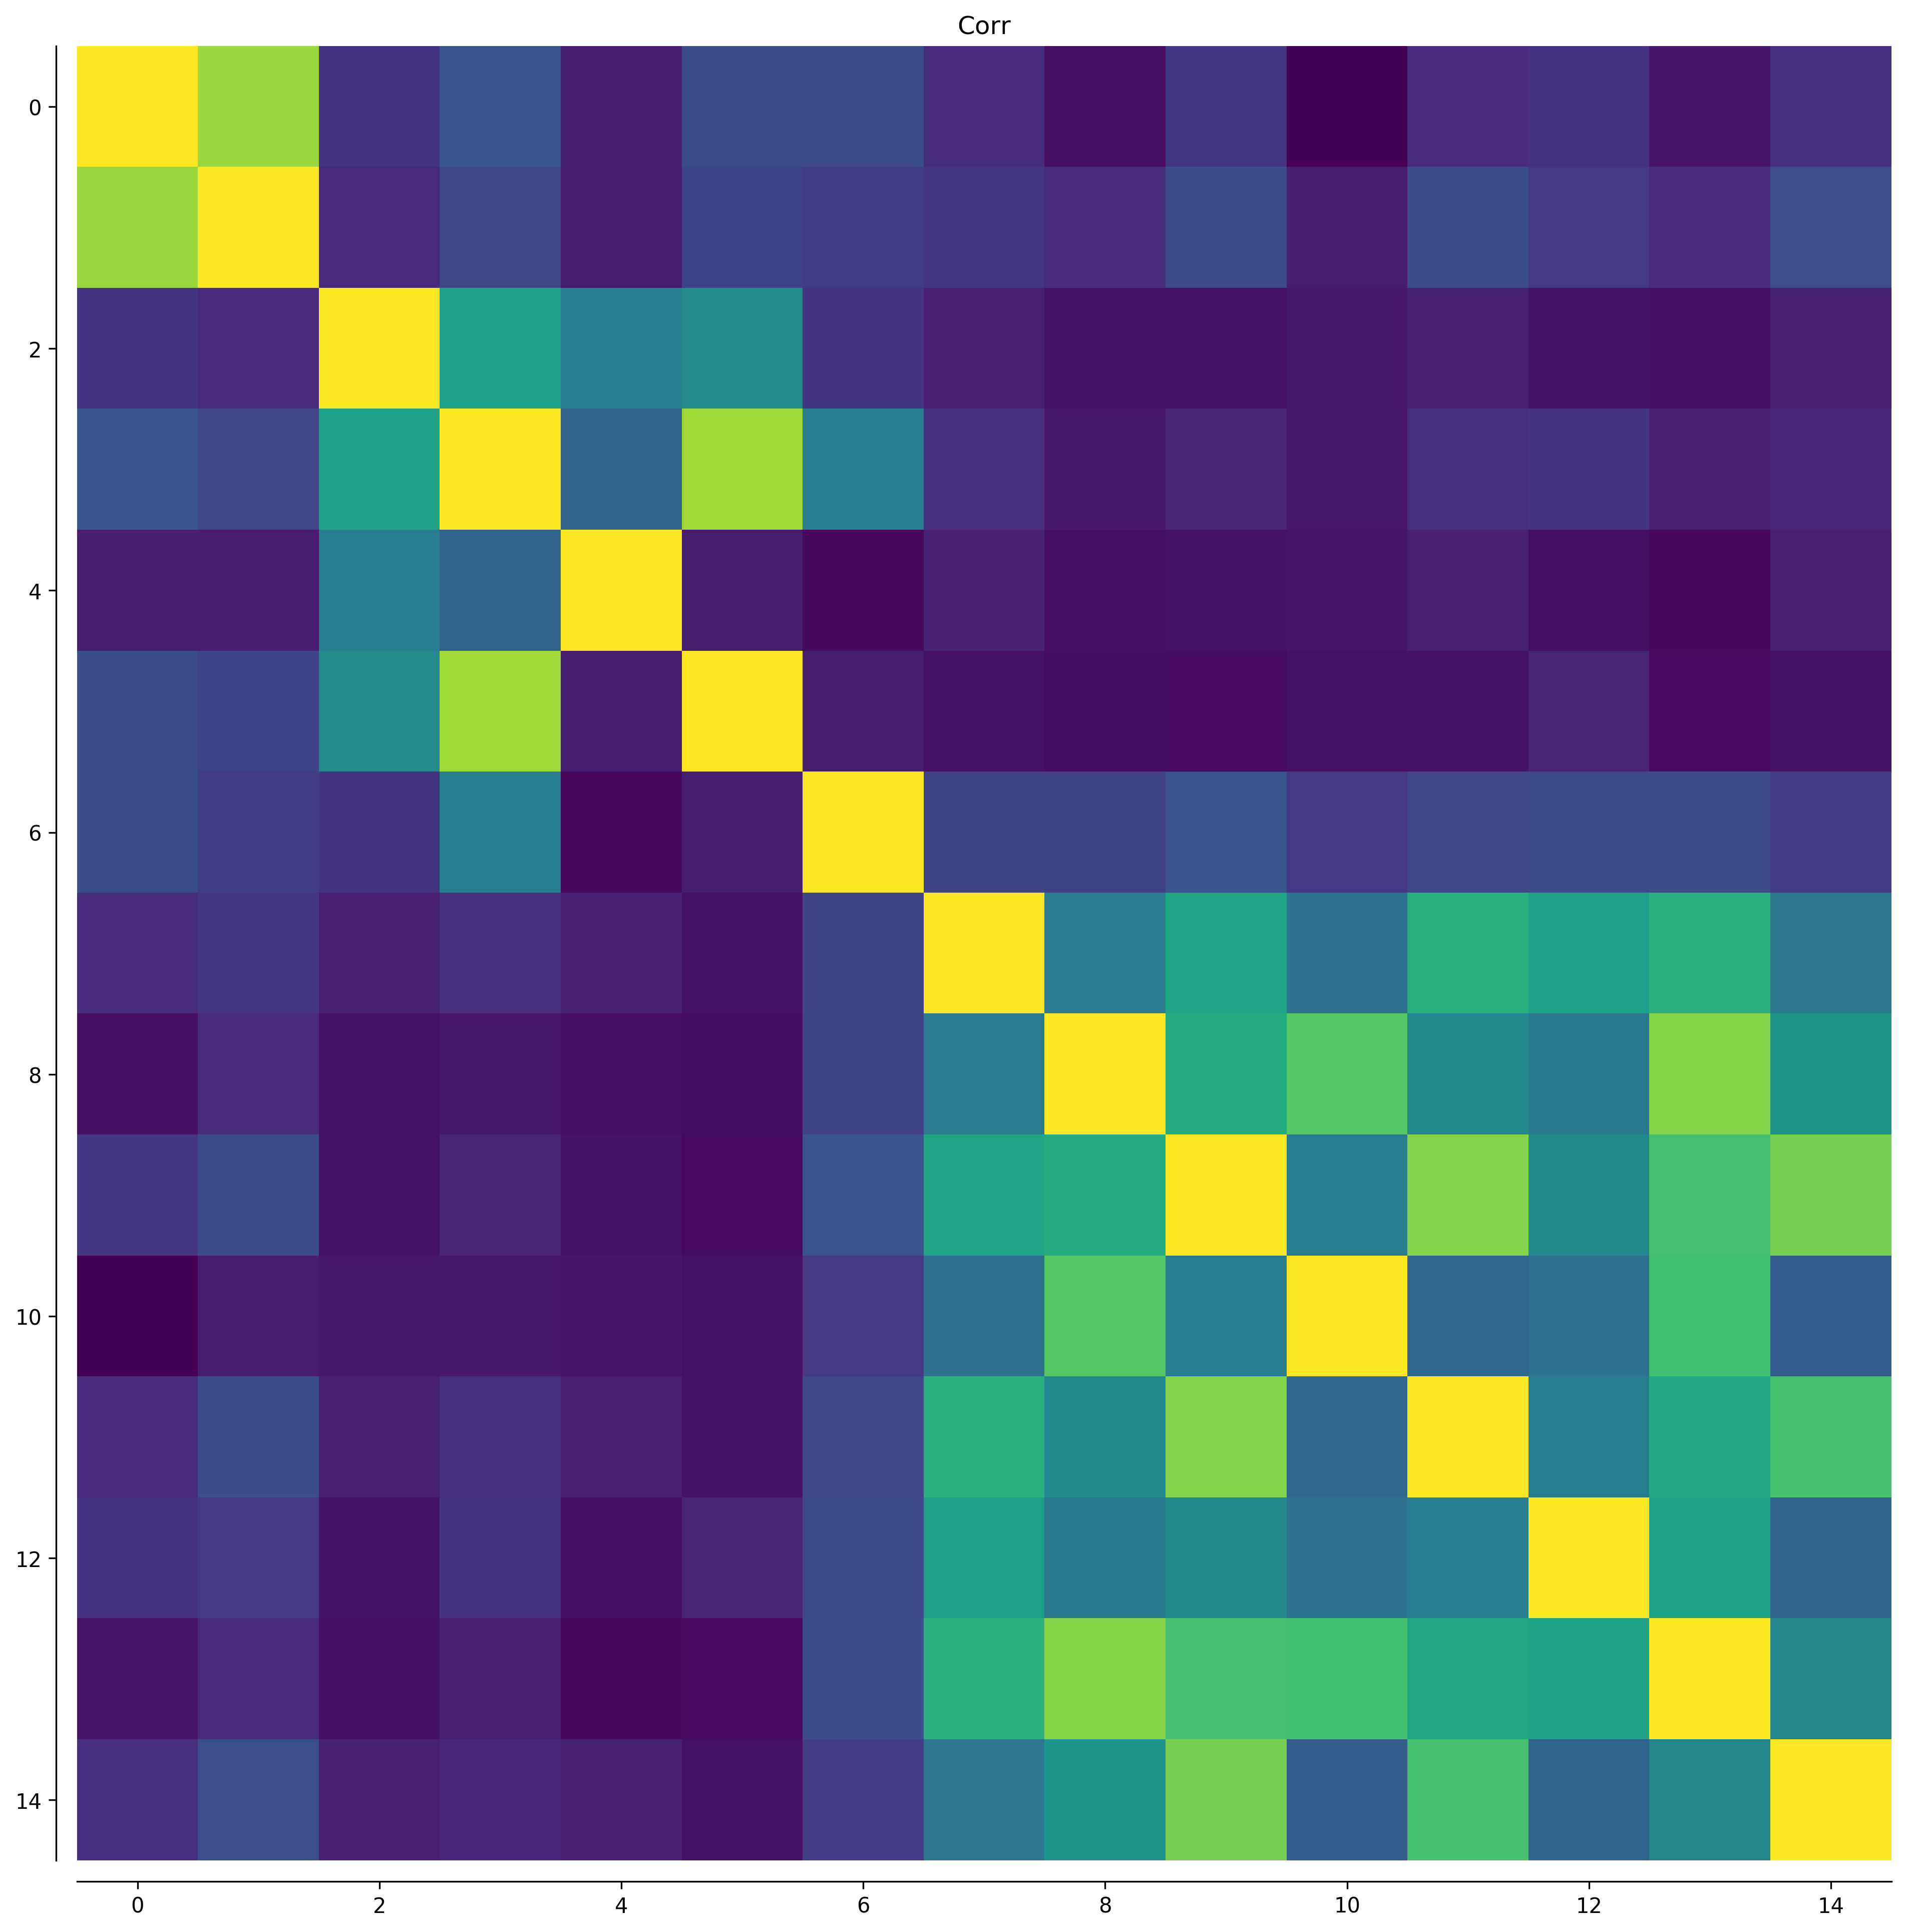

In [596]:
dFData=dF.iloc[1:,3:]# 取dF的数据部分

dFData=dFData.reset_index()
dFData.pop('index')
dFData=dFData.astype(float)
#dF_corr=dFData.corr()

tmp=dropCol(dFData,0.9,1)
#tmp=dFData
dF_corr_tmp=tmp.corr()
plotCorr(dF_corr_tmp)

In [516]:
tmp=tmp.reset_index()
tmp.pop('index')

indexList=dF['GEO.id2'][1:]
indexList=indexList.reset_index()
indexList.pop('index')

try:
    tmp.insert(0,'FIPS',indexList)
except:
    tmp.pop('FIPS')
    tmp.insert(0,'FIPS',indexList)
    
tmp

HC01_VC20  HC01_VC21  HC01_VC53  HC01_VC54  HC01_VC55  HC01_VC56  \
0         2.41       2.93        0.0       65.0       78.0      110.0   
1         2.47       2.95       56.0       85.0       86.0      173.0   
2         2.51       2.89       20.0       48.0       12.0      113.0   
3         2.45       2.85       74.0       73.0       35.0      133.0   
4         2.46       2.97       74.0       72.0       86.0      135.0   
5         2.61       3.12       51.0       76.0        0.0      201.0   
6         2.53       3.05       51.0       70.0       84.0      128.0   
7         2.74       3.23       37.0       55.0       29.0       98.0   
8         2.41       2.90       87.0       58.0       52.0      128.0   
9         2.39       2.96       50.0       49.0       17.0      108.0   
10        2.37       2.83       34.0       61.0        9.0      132.0   
11        2.67       3.20       44.0       72.0        7.0      171.0   
12        2.66       3.47       47.0       41.0        0.0       83.0   
13        2.61       3.07       44.0       49.0       24.0      120.0   
14        2.65       3.04       41.0       51.0       15.0      108.0   
15        2.43       2.92       39.0       93.0        0.0      214.0   
16        2.45       3.05       35.0       52.0        0.0      135.0   
17        2.26       2.82       12.0       40.0       11.0       72.0   
18        2.41       3.07       34.0       62.0       21.0      121.0   
19        2.44       2.86      102.0       51.0       15.0      133.0   
20        2.51       2.88       30.0       50.0       28.0       41.0   
21        2.53       3.01       42.0       49.0       79.0       80.0   
22        2.61       3.18       12.0       43.0       10.0      104.0   
23        2.59       3.09       77.0      100.0       73.0      164.0   
24        2.42       2.81      100.0       73.0       72.0      144.0   
25        3.21       4.03       36.0       42.0       25.0       74.0   
26        2.43       3.04       36.0       56.0        0.0       79.0   
27        2.45       3.08        8.0       16.0        0.0       43.0   
28        2.58       3.31        0.0        0.0        0.0        0.0   
29        2.45       3.01       49.0       51.0       35.0       98.0   
30        2.43       2.84       20.0       56.0       10.0      136.0   
31        2.54       3.11       90.0       53.0      134.0      113.0   
32        2.61       3.16       20.0       48.0      189.0       61.0   
33        2.29       2.90       28.0       48.0       38.0       75.0   
34        2.55       3.08       64.0       43.0       12.0      118.0   
35        2.48       2.99       22.0       40.0       30.0       78.0   
36        2.25       2.88       35.0       45.0       14.0       91.0   
37        2.22       2.63       63.0       58.0       31.0      161.0   
38        2.75       3.36       70.0       52.0       64.0      131.0   
39        2.67       3.14       13.0       38.0        0.0      108.0   
40        2.75       3.09       87.0       91.0       87.0      200.0   
41        2.47       2.99       40.0       54.0       45.0      101.0   
42        2.56       3.13       47.0       55.0       28.0      110.0   
43        2.53       3.00       40.0       47.0        0.0      108.0   
44        2.54       3.10       10.0       41.0       30.0       82.0   
45        2.62       3.11       87.0       64.0       35.0      169.0   
46        2.58       3.03       45.0       60.0       34.0      117.0   
47        2.75       3.42       51.0       65.0       41.0      155.0   
48        2.55       3.22       39.0       43.0      103.0       67.0   
49        2.53       3.06       62.0       76.0       28.0      201.0   
50        2.43       2.97       51.0       63.0       26.0      132.0   
51        2.58       3.01       71.0       56.0       45.0      135.0   
52        2.33       3.07       20.0       39.0        0.0      114.0   
53        2.53       3.05       31.0       42.0       20.0     

In [518]:
def cookData(fileName):
    dF=pd.read_csv(fileName)
    #lostItems=[]
    for col in list(dF.columns):
        if dF[col].iloc[1]=='(X)' or 'Error;' in str(dF[col].iloc[0]).split() or 'Percent;' in str(dF[col].iloc[0]).split():
            dF.pop(col)
    for i in range(3,dF.shape[0]):
        for j in range(3,dF.shape[1]):
            try:
                float(dF.iloc[i][j])
            except:
                dF.iloc[i][j]=np.nan
    #             print(type(dF.iloc[i][j]),dF.iloc[i][j],(i,j))
                #lostItems.append([dF.iloc[i][j],i,j])
    #             dF.iloc[i][j]=0

    # imp = Imputer(missing_values='*****', strategy='mean', axis=0)
    # imp.fit(np.array(dF.iloc[3:,3:]))
    #清洗数据
    #lostItems=pd.DataFrame(lostItems,columns=['value','index','column'])
    dF.fillna(dF.mean())

    dFData=dF.iloc[1:,3:]# 取dF的数据部分

    dFData=dFData.reset_index()
    dFData.pop('index')
    dFData=dFData.astype(float)
    #dF_corr=dFData.corr()

    tmp=dropCol(dFData,0.9,1)
    #tmp=dFData
    #dF_corr_tmp=tmp.corr()
    #plotCorr(dF_corr_tmp)

    tmp=tmp.reset_index()
    tmp.pop('index')

    indexList=dF['GEO.id2'][1:]
    indexList=indexList.reset_index()
    indexList.pop('index')

    try:
        tmp.insert(0,'FIPS',indexList)
    except:
        tmp.pop('FIPS')
        tmp.insert(0,'FIPS',indexList)

    return(tmp)

In [584]:
def cookData2(fileName,columnSetCommon,metaSetCommon):
    dF=pd.read_csv(fileName)
    #lostItems=[]
    for col in list(dF.columns):
        if dF[col].iloc[1]=='(X)' or 'Error;' in str(dF[col].iloc[0]).split() or 'Percent;' in str(dF[col].iloc[0]).split():
            dF.pop(col)
    for i in range(3,dF.shape[0]):
        for j in range(3,dF.shape[1]):
            try:
                float(dF.iloc[i][j])
            except:
                dF.iloc[i][j]=np.nan
    dF.fillna(dF.mean())
    
    dFData=dF.iloc[1:,3:]# 取dF的数据部分
    dFData=dFData.reset_index()
    dFData.pop('index')
    dFData=dFData.astype(float)
    
    for col in dFData.columns:
        if col not in columnSetCommon:
            dFData.pop(col)
            
    for col in dFData.columns:
        if col not in metaSetCommon:
            dFData.pop(col)

    tmp=dFData.reset_index()
    tmp.pop('index')

    indexList=dF['GEO.id2'][1:]
    indexList=indexList.reset_index()
    indexList.pop('index')

    try:
        tmp.insert(0,'FIPS',indexList)
    except:
        tmp.pop('FIPS')
        tmp.insert(0,'FIPS',indexList)

    return(tmp)

In [587]:
metaSetCommon=set(pd.read_csv('ACS_'+str(10)+'_5YR_DP02_metadata.csv')['GEO.id'][2:])
for YY in range(11,17):
    metaSetCommon.intersection(pd.read_csv('ACS_'+str(10)+'_5YR_DP02_metadata.csv')['GEO.id'][2:])
columnSetCommon=set()
for YY in range(10,17):
    columnSet=set(cookData('ACS_'+str(YY)+'_5YR_DP02_with_ann.csv').columns)
    columnSet.remove('FIPS')
    columnSetCommon=columnSetCommon.union(columnSet)
for YY in range(10,17):
    dFout=cookData2('ACS_'+str(YY)+'_5YR_DP02_with_ann.csv',columnSetCommon, metaSetCommon)
    dFout.to_csv('ACS_'+str(YY)+'_COOKED.csv')
    print(len(dFout.columns))

28
28
28
26
26
26
26


            Unnamed: 0      FIPS  HC01_VC21  HC01_VC53  HC01_VC54  HC01_VC55  \
Unnamed: 0    1.000000  0.939530  -0.117532  -0.122734  -0.254353  -0.071918   
FIPS          0.939530  1.000000  -0.141201  -0.097279  -0.250157  -0.106473   
HC01_VC21    -0.117532 -0.141201   1.000000   0.025098   0.134270  -0.020125   
HC01_VC53    -0.122734 -0.097279   0.025098   1.000000   0.524825   0.361141   
HC01_VC54    -0.254353 -0.250157   0.134270   0.524825   1.000000   0.244276   
HC01_VC55    -0.071918 -0.106473  -0.020125   0.361141   0.244276   1.000000   
HC01_VC56    -0.224734 -0.209558   0.114799   0.412423   0.840687  -0.017746   
HC01_VC57    -0.006151  0.009530   0.099059   0.061246   0.365723  -0.076888   
HC01_VC172    0.035124  0.068315   0.171784  -0.032455   0.038445  -0.035541   
HC01_VC175    0.033922  0.066650   0.143718  -0.058339   0.019541  -0.038117   
HC01_VC188   -0.017206  0.059786   0.077921  -0.074616   0.009049  -0.071606   
HC01_VC191   -0.060924  0.029861   0.044

In [591]:
tmp=pd.read_csv('ACS_'+str(10)+'_COOKED.csv')
sc = StandardScaler()
pca = PCA(n_components=5)
tmp_std=sc.fit_transform(tmp)
transData=pca.fit_transform(np.array(tmp))
# PCA(copy=True, n_components=2, whiten=False)
#print(pca.explained_variance_ratio_)
transData=pd.DataFrame(transData)
#PCA分析法

In [592]:
transData

0             1              2              3             4
0    -22078.473435 -16166.109729   10028.016567    1013.280264    703.030839
1    -21946.696165 -16258.855974   10004.386030     332.572341    628.100927
2    -20311.729051 -16268.468606   10010.730293     775.639124    228.239486
3    -23336.081221 -16289.744193    9941.058409    -212.111384    993.080231
4    -18689.796212 -16666.714083    8969.272249    1450.519441    483.247730
5    -22917.518980 -16196.025608   10120.539419     240.365432    653.100982
6    -22817.427170 -16115.426254   10199.275183     541.827710    746.975255
7     20387.460744 -21748.667760   -1000.573821    4645.951563  -2795.814166
8    -21159.339696 -16278.905814    9931.433595     631.833407    550.874471
9    -13476.408183 -16115.631832   10480.985555    3022.816381  -2350.483683
10   -19028.966297 -16357.424297    9686.023482    1301.668729    168.279610
11   -22301.695508 -16516.503772    9456.441669    -246.203788    947.110352
12   -23182.690083 -16272.295820    9863.792736      57.957013   1032.652890
13   -19615.989045 -16376.902257    9795.784589     712.139987    -73.949437
14    -6995.440621 -17554.809299    7534.081165    2532.093329  -1943.346498
15   -23609.366444 -16237.980596    9949.258529     -65.715075   1099.459674
16   -22685.790951 -16253.988458    9907.685357     235.806816    923.653082
17   -17053.160280 -16464.025273    9455.431555    1660.223987    289.171807
18    12779.619740 -22098.154693   -1579.404800     865.133200  -2086.136276
19   -24457.647147 -16215.742420    9993.088252    -430.226828   1260.255079
20   -22694.393904 -16322.242905    9735.341213     259.209218   1031.872661
21   -19575.361981 -16416.009117    9627.294883    1031.827999   -120.008965
22   -23045.042298 -16323.402075    9712.102126      41.694094   1126.025313
23   -12571.892617 -16412.454600    9420.860709    2952.350588   -152.007720
24   -18317.626221 -16221.753673   10007.260938    1356.529489    -80.520542
25   -23246.530996 -16142.927502   10138.808647      76.936258    836.773454
26   -23359.068555 -16094.680794    9918.895105    1270.919356   1016.017100
27   -23679.124167 -16167.265657   10053.646406     -78.264928    999.471221
28   -24114.072387 -16312.092545    9686.192520    -209.108967   1345.346862
29    -5911.402527 -17201.694693    7879.611620    5062.425029  -2746.543383
30   -23516.313790 -16174.233931   10035.843546    -134.851958   1023.658913
31   -23976.858695 -16233.093871    9894.248618    -228.989477   1186.666539
32   -23139.096825 -16200.610973    9964.530825      11.720456    944.788274
33    40670.605420 -16807.129209    7885.607420   21949.059554  -6483.817165
34   -21669.419432 -16206.046939   10009.961857     326.633721    357.876670
35   -19989.288894 -16170.267643   10070.968640    1230.940638   -276.403920
36   -14411.528993 -16334.905859    9663.080657    2909.974241   -938.102580
37   -24099.682778 -16263.578285    9809.694491    -495.391358   1350.917620
38   -22435.639854 -16435.260252    9503.865257    -256.305115   1029.449511
39   -21179.520517 -16370.184034    9601.582496     451.859853    464.162353
40   -17519.404270 -16962.005103    8503.808251     311.531788    151.533398
41   -18195.604918 -16297.682445    9771.550136    1638.496022   -281.176895
42   -20993.843759 -16165.958108   10065.141022     675.892233     17.579166
43   -23438.848533 -16183.400746    9944.265923    -204.413435   1079.374816
44   -15170.465176 -16539.159588    9358.300497    1774.676650  -1118.333099
45   -23335.454499 -16449.883704    9364.195688    -335.736029   1292.729895
46    -2441.462495 -17114.143217    7974.556651    4981.793828  -1785.077249
47   -21205.549332 -15941.352031   10534.761187     745.429393   -126.824919
48   -20570.782060 -16592.767389    9097.070260     326.045674    656.065661
49   -22072.910081 -16179.160181    9961.033345     292.344127    593.295830
50   -14799.416401 -17007.170865    8211.116583    1856.138293   -364.429435
51   -21648.2

In [531]:
def plotCorrNet(dF_corr):
    plt.cla()
    plt.rcParams['figure.figsize']=[16,16]
    G=nx.Graph()
    colors=[]
    for i in range(dF_corr.shape[0]):
        G.add_node(dF_corr.index[i])
    for j in range(dF_corr.shape[0]):
        for i in range(dF_corr.shape[1]):
            G.add_edge(dF_corr.index[i],dF_corr.index[j],weight=dF_corr.iloc[i,j])
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.9]
    eplenty= [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.7 and d['weight'] <= 0.9 ]
    emedium= [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5 and d['weight'] <= 0.7 ]
    efew= [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.3 and d['weight'] <= 0.5 ]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.3]
    pos = nx.spring_layout(G)

    nx.draw_networkx_edges(G, pos, edgelist=elarge, edge_color='#8A9CCC', alpha=0.15,label='links')
    nx.draw_networkx_edges(G, pos, edgelist=eplenty, edge_color='#3A5499', alpha=0.15,label='links')
    nx.draw_networkx_edges(G, pos, edgelist=emedium, edge_color='#C6F4FF', alpha=0.15,label='links')
    nx.draw_networkx_edges(G, pos, edgelist=efew, edge_color='#FFAE86', alpha=0.15,label='links')
    nx.draw_networkx_edges(G, pos, edgelist=esmall, edge_color='#CC968A', alpha=0.15,label='links')

    nx.draw_networkx_nodes(G, pos, with_labels=False,
                           node_size=8,
                           node_color='#FFAF1E',
                           alpha=0.6,
                           label='nodes',
                           edge_cmap=plt.cm.Blues
                          )
    plt.legend(loc='lower right')
    plt.show()
    # 画协方差网络图。。。

In [532]:
#plotCorrNet(dF_corr_tmp)

## 数据的预处理
1. 拿到的数据是按年的统计数据，首先去掉所有的百分比数据(冗余)，和误差(不研究)
5. 对比2010到2017的数据，参考附带的metadata，保留共同的列(每年数据)
2. 对于每年的数据，用列平均值填补缺失的数据，理由是一方面缺失的数据很少，总的来说各项数据分布较为均匀，一方面美国的各个county的面积差别不大
3. 进行相关性分析，计算每一系列相关系数(皮尔森相关系数)，得到一个相关系数矩阵，表示每两列数据相互的相关系数
4. 根据矩阵筛选掉相关系数大的列(相关系数大于0.9)，两个列相关系数大被认为是重复的信息
5. 最终得到25维的数据，原始数据是596维的

## 降维
1. 使用PC把25维的数据降到5维
2. 使用k-Means 聚类

## 消失的统计数据
1. 一些列在统计过程中消失了
2. 郡(fips=51515) 消失了

